In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# import json
from pylab import figure
import ast
import os
import pandas as pd
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from dtw import dtw
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_dataframe(filepath):
    data = pd.read_csv(filepath, sep=", ", header=None)
    data[0] = data[0].apply(lambda x: x.replace("[(", ""))
    data[2] = data[2].apply(lambda x: x.replace(")", ""))
    data[3] = data[3].apply(lambda x: x.replace("(", ""))
    data[5] = data[2].apply(lambda x: x.replace(")]", ""))
    for i in range(len(data.columns)):
        data[i] = data[i].apply(lambda x: int(x))
    data.columns = ['accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ']
    return data 

In [3]:
def get_avg_from_dataframes(dataframe_lsts):
    dfs = dataframe_lsts
    averages = pd.concat([each.stack() for each in dfs],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
    return averages

In [4]:
def gesture_overall_dataframe(root_dir):
    dataframes = []
    for fname in os.listdir(root_dir):
        if fname == '.DS_Store':
            continue
        filepath = os.path.join(root_dir, fname)
        dataframes.append(load_dataframe(filepath))
    bite_avg = get_avg_from_dataframes(dataframes)
    return bite_avg

In [5]:
bite = gesture_overall_dataframe("Sensor_Data_For_Bite_using_Accelerometer")
bite_new = gesture_overall_dataframe("Sensor_Data_For_BiteNew_using_Accelerometer")
left_bite = gesture_overall_dataframe("Sensor_Data_For_LeftBite_using_Accelerometer")
left_bite_new = gesture_overall_dataframe("Sensor_Data_For_LeftBite_new_using_Accelerometer")
right_bite = gesture_overall_dataframe("Sensor_Data_For_RightBite_Using_Accelerometer")
right_bite_new = gesture_overall_dataframe("Sensor_Data_For_RightBite_new_Using_Accelerometer")
front_bite = gesture_overall_dataframe("Sensor_Data_For_Front_Bite_using_Accelerometer")
front_bite_new = gesture_overall_dataframe("Sensor_Data_For_Frontbite_New_Using_Accelerometer")
still = gesture_overall_dataframe("Sensor_Data_For_Still_posA_using_Accelerometer")
still_new = gesture_overall_dataframe("Sensor_Data_For_Still_PosB_using_Accelerometer")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [6]:
def get_numpy_array_for_acclerometer(df):
    return df.as_matrix(columns=still.columns[:3])

In [7]:
def get_numpy_array_for_gyroscope(df):
    return df.as_matrix(columns=still.columns[4:])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


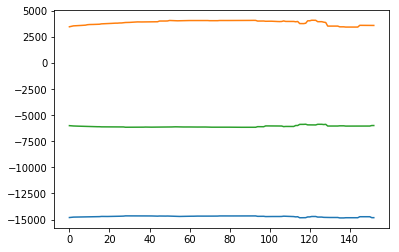

In [10]:
plot(get_numpy_array_for_acclerometer(bite))
bite_acc = get_numpy_array_for_acclerometer(bite)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


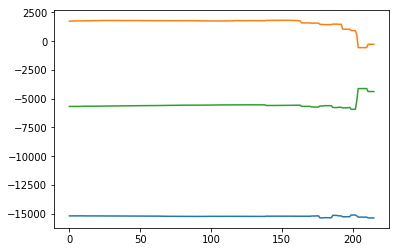

In [11]:
plot(get_numpy_array_for_acclerometer(still))
still_acc = get_numpy_array_for_acclerometer(still)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


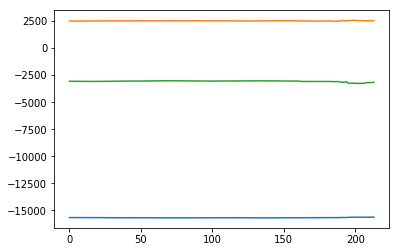

In [38]:
plot(get_numpy_array_for_acclerometer(still_new))
still_new_acc = get_numpy_array_for_acclerometer(still_new)

In [12]:
dist, cost, acc, path = dtw(bite_acc, still_acc, dist=lambda x, y: norm(x - y, ord=1))

In [15]:
print('Minimum distance found between bite and still at Pos A is: ', dist)


Minimum distance found between bite and still is : 1854.4439243382321


In [29]:
def dtw_gesture_and_still(gesture_df, control_df, gesture_name="Gesture", pos='A'):
    acc = get_numpy_array_for_acclerometer(gesture_df)
    control_df = get_numpy_array_for_acclerometer(control_df)
    plot(acc)
    dist, cost, acc, path = dtw(acc, control_df, dist=lambda x, y: norm(x - y, ord=1))
    print('Minimum distance found between {} and still at Pos {} is: '.format(gesture_name, pos), dist)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Minimum distance found between bite and still at Pos A is:  1854.4439243382321


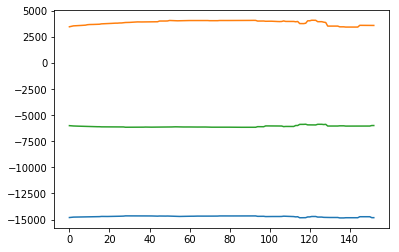

In [31]:
dtw_gesture_and_still(bite, still, 'bite', 'A')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Minimum distance found between bite and still at Pos B is:  11239.8384765796


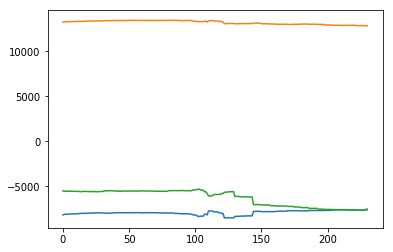

In [32]:
dtw_gesture_and_still(bite_new, still_new, 'bite', 'B')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Minimum distance found between left_bite and still at Pos A is:  3510.3582557344284


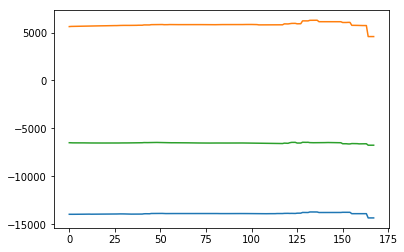

In [33]:
dtw_gesture_and_still(left_bite, still, 'left_bite', 'A')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Minimum distance found between left_bite and still at Pos B is:  14792.32077655614


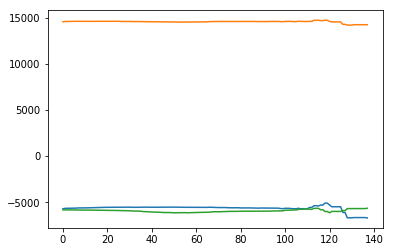

In [34]:
dtw_gesture_and_still(left_bite_new, still_new, 'left_bite', 'B')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Minimum distance found between right_bite and still at Pos A is:  2004.2870533910527


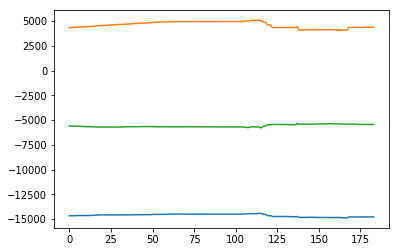

In [36]:
dtw_gesture_and_still(right_bite, still, 'right_bite', 'A')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Minimum distance found between right_bite and still at Pos B is:  10593.0843892296


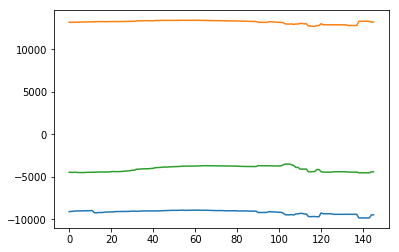

In [37]:
dtw_gesture_and_still(right_bite_new, still_new, 'right_bite', 'B')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Minimum distance found between front_bite and still at Pos A is:  2217.3682924071804


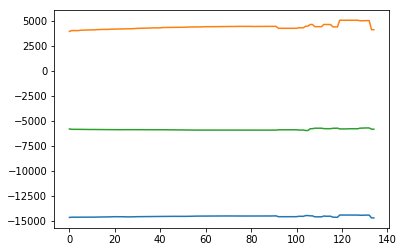

In [39]:
dtw_gesture_and_still(front_bite, still, 'front_bite', 'A')

In [ ]:
dtw_gesture_and_still(front_bite_new, still_new,)